In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# getting the dataset

df = sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


The varable **total** is the amount of people invloved in a fatal car accident. States are different sizes and so numbers vary per billion miles. This variable is not the total ammount of accidents that took place.   
The variables **speeding**,	**alcohol**, **not_distracted**	, **no_previous** are all based on the amount of people who were invovled in that type of car accident.  
The variables **ins_premium** and 	**ins_losses** are based on currencies possible USD . 	 

In [50]:
df.isna().sum()

total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


### What is the distribution of the total number of accidents across states?            

<Axes: xlabel='abbrev', ylabel='total'>

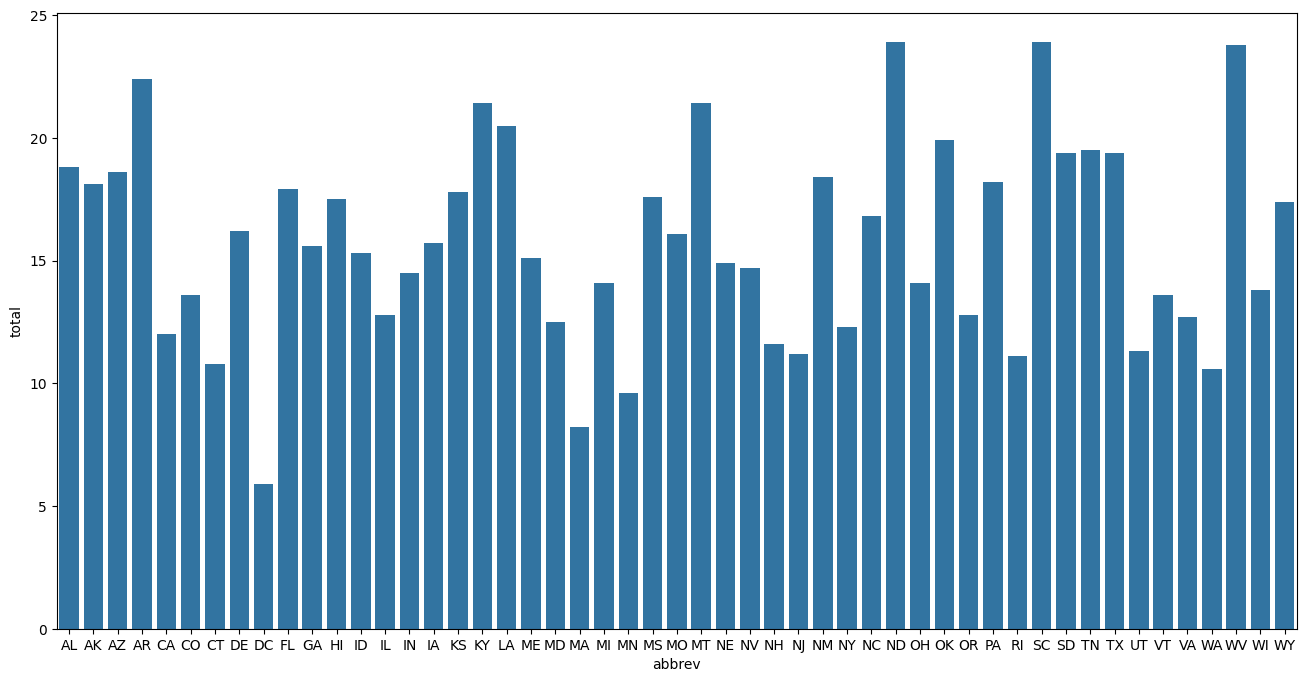

In [53]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x="abbrev", y="total")

The distribution of total number of accidents across states is all over the place. There seems to be no correlation because all the values between the different states since they are all independent variables.

### What is the relationship between the number of speeding-related accidents and the number of alcohol-related accidents?


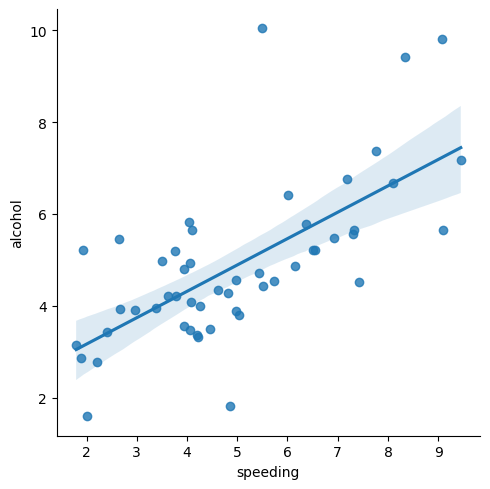

In [54]:
sns.lmplot(data=df, x="speeding", y="alcohol")

**I need to describe this relationship**. I know it's liner and semm related but these are two independent varibles. But seem very correlated

### Is there a correlation between the total number of accidents and the percentage of drivers who were speeding?


In [55]:
# make a correlation matrix between total accidents and drivers speeding ????
# make a speeding_percent columns


### Does the proportion of drivers who were not distracted have an effect on the total number of accidents?

### 5) Is there a relationship between the number of car accidents and the type of day of the week?

The dataset has not column or data points that show days of a week and so there is no relationship between car accidents and type of day of week 

### 6) How well can you predict the number of car crashes in a state based on the other variables in the dataset?


<Axes: >

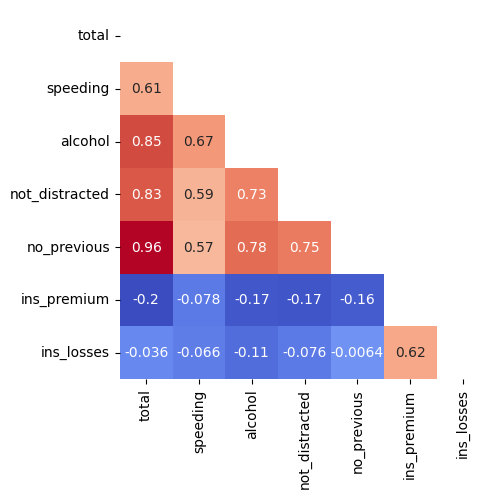

In [56]:
# we can use linear regression to predict this
# y variable could be 

# removing the abbrev for the corr heatmap
df_corr = df.drop(axis=1, labels=["abbrev"])

mask = np.triu(df_corr.corr())
sns.heatmap(df_corr.corr(), cmap="coolwarm",annot=True, cbar=False, square=True, mask=mask)

There is a strong correlation between **no_previous**, **not_distracted** and **alcohol**.  
So we need to see how they are distributed so show what type of relationship they have with the total column.  

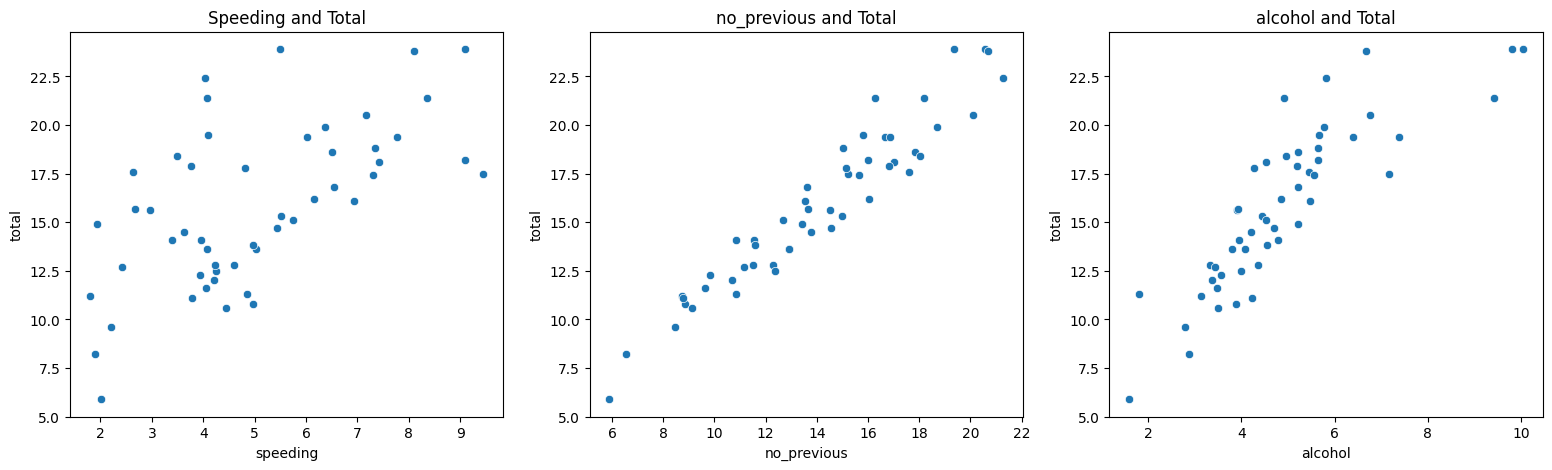

In [57]:
fig, axis =  plt.subplots(ncols=3, figsize=(19,5))


sns.scatterplot(data=df, x="speeding", y="total", ax=axis[0])
axis[0].set_title("Speeding and Total")

sns.scatterplot(data=df, x="no_previous", y="total", ax=axis[1])
axis[1].set_title("no_previous and Total")

sns.scatterplot(data=df, x="alcohol", y="total", ax=axis[2])
axis[2].set_title("alcohol and Total")

plt.show()

We can see from the Scattor plot that **no_previous** and **total** have a linear relationship.  
We can use linear regression to predict the number of car crashses in a state based on **no_previous**.  
We could possible use **alcohol** as another bases for predicting aswell  


##### 7. How effectively can you classify the states into low, medium and high number of car crashes based on the other variables in the dataset? Avoid using machine learning by binning according to EDA for maximum separation of the three classes. Analyze your results by speaking to a countplot and metrics like accuracy and F1 score for classification.


In [62]:
# getting ground truth
df_binned = df.copy() 
df_binned["TotalCategory"] = pd.cut(df["total"], bins=[0, 14, 17, float("inf")])

df_binned["TotalCategory"].value_counts()

TotalCategory
(17.0, inf]     21
(0.0, 14.0]     18
(14.0, 17.0]    12
Name: count, dtype: int64

Text(0.5, 1.0, 'Binning with alcohol')

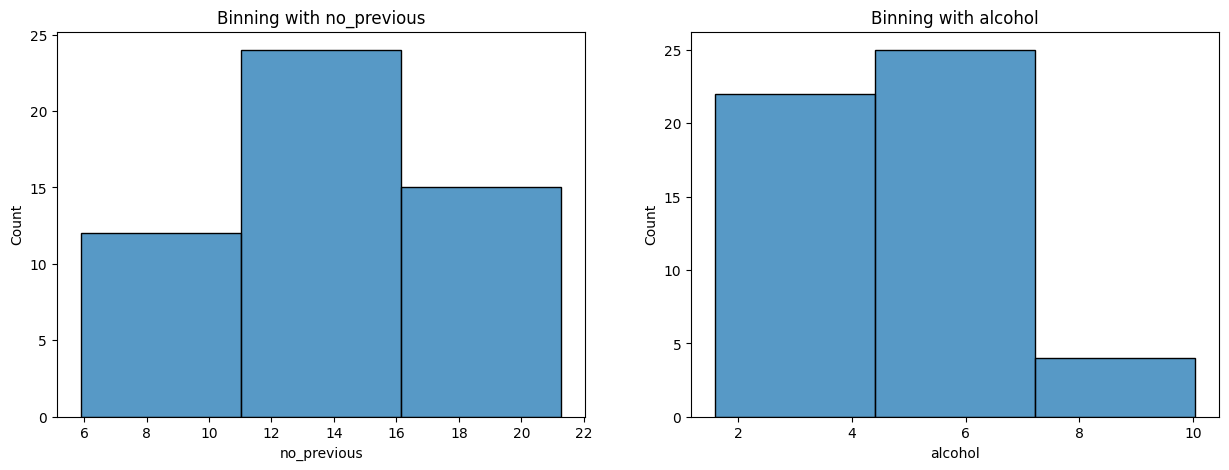

In [59]:

fig, axis =  plt.subplots(ncols=2, figsize=(15,5))

sns.histplot(df, x="no_previous", bins=3, ax=axis[0])
axis[0].set_title("Binning with no_previous")

sns.histplot(df, x="alcohol", bins=3, ax=axis[1])
axis[1].set_title("Binning with alcohol")
